In [1]:
from numpy import *
from matplotlib.pyplot import *
%matplotlib qt
matplotlib.use('Qt5Agg') # needed as default backend is too slow

# Simulación Péndulo Doble Rígido

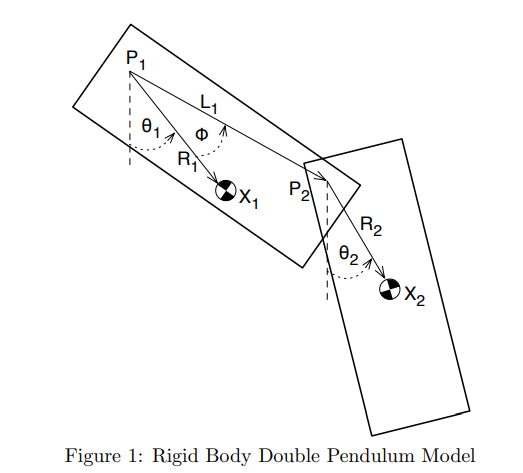

In [12]:
datos = []

with open("Datos_Simulacion.txt") as fname:
	for lineas in fname:
		datos.append(lineas.split())

Datos=np.array(datos[1:])

x1=Datos[:,0].astype(float)
y1=Datos[:,1].astype(float)
x2=Datos[:,2].astype(float)
y2=Datos[:,3].astype(float)
v1x=Datos[:,4].astype(float)
v1y=Datos[:,5].astype(float)
v2x=Datos[:,6].astype(float)
v2y=Datos[:,7].astype(float)
v3x=Datos[:,8].astype(float)
v3y=Datos[:,9].astype(float)
v4x=Datos[:,10].astype(float)
v4y=Datos[:,11].astype(float)
v5x=Datos[:,12].astype(float)
v5y=Datos[:,13].astype(float)
v6x=Datos[:,14].astype(float)
v6y=Datos[:,15].astype(float)
p2x=Datos[:,16].astype(float)
p2y=Datos[:,17].astype(float)
teta1=Datos[:,18].astype(float)
teta2=Datos[:,19].astype(float)
omega1=Datos[:,20].astype(float)
omega2=Datos[:,21].astype(float)

B=12 #largo rectangulo
n=1000 #numero de pasos de tiempo

#----- inicializacion de graficos
figure(figsize=(7,7))        # hacer figura cuadrada
lim = (2*B) + 0.3*(2*B)  # longitud cuerda mas un poquito
xlim(-lim, lim)              # limites en x 
ylim(-lim, lim)              # limites en y

plot(0,0,'ro',ms=5, label="Pivotes ")          # punto origen (pivote 1)
plot(80,80,"bo",ms=5, label="Centros de masa")
title("RK4 Péndulo Rígido Doble")

for i in range(n):

    #------ implementacion del grafico animado: 
    cuerda1, = plot([v2x[i], v1x[i]],[v2y[i], v1y[i]],'k-')  # graficar cuerda
    cuerda2, = plot([v1x[i],p2x[i]],[v1y[i],p2y[i]],"k-")
    cuerda3, = plot([p2x[i],v3x[i]],[p2y[i],v3y[i]],"k-")
    cuerda4, = plot([v3x[i],v2x[i]],[v3y[i],v2y[i]],"k-")
    cuerda5, = plot([p2x[i],v4x[i]],[p2y[i],v4y[i]],"k-")
    cuerda6, = plot([v4x[i],v5x[i]],[v4y[i],v5y[i]],"k-")
    cuerda7, = plot([v5x[i],v6x[i]],[v5y[i],v6y[i]],"k-")
    cuerda8, = plot([v6x[i],p2x[i]],[v6y[i],p2y[i]],"k-")
    pivote2, = plot(p2x[i],p2y[i],"ro",ms=4)
    masa1,   = plot(x1[i], y1[i],'bo',ms=5)       # graficar masa unida a cuerda
    masa2,   = plot(x2[i],y2[i],"bo",ms=5)
    
    
    pause(1e-4)              # pausa (segundos) despues de graficar
    cuerda1.remove()          # remover punto de coord cuerda
    cuerda2.remove()
    cuerda3.remove()
    cuerda4.remove()
    cuerda5.remove()
    cuerda6.remove()
    cuerda7.remove()
    cuerda8.remove()
    pivote2.remove()
    masa1.remove()            # remover punto de coord de masa
    masa2.remove()
    legend()

show()

# Curva de Lissajous

Son las trayectorias que tienen un objeto sometido a dos movimientos armónicos simples (pendulares en este caso). Las formas de las figuras depende de condiciones como la amplitud, la longitud y la diferencia de fase entre los dos movimientos.

In [39]:
plot(teta1,teta2,"b")
xlabel(r"$\theta_1$")
ylabel(r"$\theta_2$")
title("Figura de Lissajous")
grid()
show()

In [40]:
t=arange(n)

fig=figure(figsize=(10,8))
ax=axes(projection='3d')
ax.plot(teta1,teta2,t,"b")
ax.set_xlabel(r"$\theta_1$")
ax.set_ylabel(r"$\theta_2$")
ax.set_zlabel(r"$t$")
ax.set_title("Figura de Lissajous")
show()

# Diagramas de Fase

In [41]:
plot(teta1,omega1,"b")
xlabel(r"$\theta_1$")
ylabel(r"$\omega_1$")
title("Diagrama de Fase, Rectangulo 1")
grid()
show()

In [42]:
plot(teta2,omega2,"b")
xlabel(r"$\theta_2$")
ylabel(r"$\omega_2$")
title("Diagrama de Fase, Rectangulo 2")
grid()
show()

In [43]:
t=arange(n)

fig=figure(figsize=(10,8))
ax=axes(projection='3d')
ax.plot(teta1,omega1,t,"b")
ax.set_xlabel(r"$\theta_1$")
ax.set_ylabel(r"$\omega_1$")
ax.set_zlabel(r"$t$")
ax.set_title("Diagrama de Fase, Rectangulo 1")
show()

In [44]:
t=arange(n)

fig=figure(figsize=(10,8))
ax=axes(projection='3d')
ax.plot(teta2,omega2,t,"b")
ax.set_xlabel(r"$\theta_2$")
ax.set_ylabel(r"$\omega_2$")
ax.set_zlabel(r"$t$")
ax.set_title("Diagrama de Fase, Rectangulo 2")
show()